# La roue des émotions

In [21]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
nlp = spacy.load('en_core_web_trf')

In [9]:
df = pd.read_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Data\emotions_final.csv', sep=',')

In [92]:
df.info

<bound method DataFrame.info of                                                     Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism     fear
21455  Successive state elections have seen the gover...     fear
21456               Vincent was irritated but not dismay     fear
21457  Kendall-Hume turned back to face the dismayed ...     fear
21458                    I am dismayed , but not surpris     fear

[21459 rows x 2 columns]>

### Normalisation

In [10]:
lowers = []
for i in range(0, df.shape[0]):
    lowers.append(df['Text'][i].lower())

### Tokenization et Lemmatization

In [11]:
ids = []
words = []
lemmas = []
pos = []
for i in range(0, df.shape[0]):
    doc = nlp(df['Text'][i])
    for token in doc :
        if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_quote and not token.is_space:
            ids.append(i)
            words.append(token.text)
            lemmas.append(token.lemma_)
            pos.append(token.pos_)

In [12]:
df_words_lemmas = pd.DataFrame({'Doc': ids, 'Word': words, 'Lemma': lemmas, 'Part of speech': pos}, columns=['Doc', 'Word', 'Lemma', 'Part of speech'])

In [13]:
df_words_lemmas.to_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Output\Data\df_words_lemmas.csv', index=False)

In [37]:
#df_words_lemmas = pd.read_csv(r'C:\Users\straw\Desktop\AIS\ProjectPool 2\Roue-des-emotions\Output\Data\df_words_lemmas.csv', sep=',')

In [14]:
df_words_lemmas

,Doc,Word,Lemma,Part of speech
0,0,nt,nt,PART
1,0,feel,feel,VERB
2,0,humiliated,humiliated,ADJ
3,1,feeling,feel,VERB
4,1,hopeless,hopeless,ADJ
...,...,...,...,...
178437,21457,face,face,VERB
178438,21457,dismayed,dismayed,ADJ
178439,21457,coup,coup,NOUN
178440,21458,dismayed,dismayed,ADJ


In [22]:
np.unique(df_words_lemmas['Part of speech'])

array(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM',
       'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB', 'X'],
      dtype=object)

In [68]:
df_words_lemmas[df_words_lemmas['Part of speech']=='NUM']

,Doc,Word,Lemma,Part of speech
3416,390,thousand,thousand,NUM
4135,468,nineteen,nineteen,NUM
6006,690,zero,zero,NUM
6999,799,thousand,thousand,NUM
7167,820,zero,zero,NUM
8203,947,thousand,thousand,NUM
8527,990,thirty,thirty,NUM
9359,1077,million,million,NUM
11942,1379,eighteen,eighteen,NUM
14425,1674,million,million,NUM


In [70]:
temp = df_words_lemmas[df_words_lemmas['Part of speech']=='X']['Word'].reset_index(drop=True)
for i in range(0, len(temp)):
    print(temp[i])

etc
leanne
wushu
img
http
s
etc
w
hw
deen
r
href
http
provokingbeauty
st
etc
href
http
twitter
uk
thia
amp
min
fma
erik
amp
f
rel
http
ano
depois
ther
co
etc
ow
href
http
ambleside
href
http
www
ac
desp
etc
http
derfwadmanor
la
destinys
gracias
todo
etc
w
e
http
d
http
andthenwear
pm
href
http
creativecommons
http
e
href
http
churchoffuck
deform
diego
dr
href
http
idreamculture
http
si
href
http
douevenlift
franz
puff
yunhos
n
rel
http
babychaser
href
http
lawrencewashington
sumthg
tat
s
href
http
www
ty
s
bon
d
t
href
http
img
src
http
etc
aoa
stpm
href
http
www
tsa
rte
embaressed
p
maine
philips
reaura
s
zay
kay
luka
href
http
href
http
www
t
http
zackmdavis
s
http
s
etc
etc
http
savingyourmarriagebeforeitstarts
ie
s
david
lj
hihi
href
http
d
etc
href
scabi
v
href
http
www
http
www
etc
gt
http
xs
s
ini
amp
b
agiatated
http
href
http
en
rugmi
ww
la
coeur
d
conquerer
xd
un
un
href
http
www
feels
http
vol
etc
etc
von
etc
etc
t
amp
p
ibleeditout
tbr
href
http
creativeliar
href
http
www
h

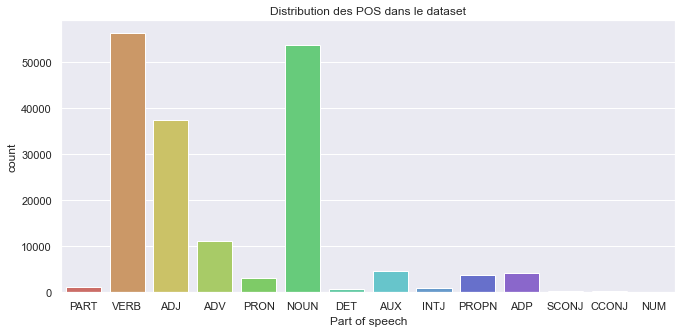

In [84]:
sns.set(rc={"figure.figsize":(11, 5)})
sns.countplot(x='Part of speech', data=df_words_lemmas, palette='hls')
plt.title('Distribution des POS dans le dataset')
plt.show()

## Suppression du "bruit"

In [73]:
remove = ['X', 'PUNCT']

In [76]:
df_words_lemmas = df_words_lemmas[~df_words_lemmas['Part of speech'].isin(remove)].reset_index(drop=True)

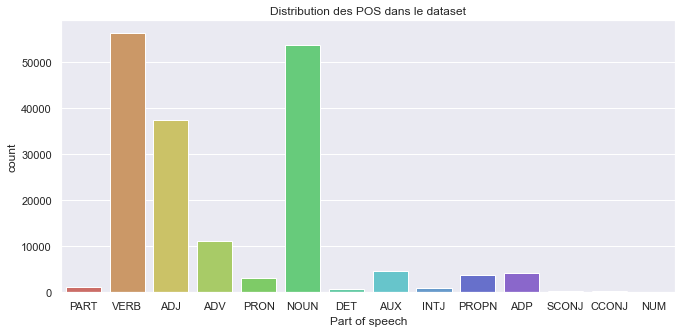

In [83]:
sns.set(rc={"figure.figsize":(11, 5)})
sns.countplot(x='Part of speech', data=df_words_lemmas, palette='hls')
plt.title('Distribution des POS dans le dataset')
plt.show()

In [108]:
group = df_words_lemmas.groupby('Doc')['Lemma']

In [114]:
df_documents_lemmas = group.aggregate(lambda x: list(x)).reset_index()
df_documents_lemmas

,Doc,Lemma
0,0,"[nt, feel, humiliated]"
1,1,"[feel, hopeless, damned, hopeful, care, awake]"
2,2,"[m, grab, minute, post, feel, greedy, wrong]"
3,3,"[feel, nostalgic, fireplace, know, property]"
4,4,"[feeling, grouchy]"
...,...,...
21453,21454,"[Melissa, stare, friend]"
21454,21455,"[successive, state, election, see, govern, par..."
21455,21456,"[Vincent, irritated, dismay]"
21456,21457,"[Kendall, Hume, turn, face, dismayed, coup]"
